#                            Predicting Conflict Outcomes
by Jigar Khatri

# Explanation of Project
- With this project I am looking to test out a few machine learing models by using them to predict conflict outcomes.
- The conflicts are conventional interstate conflicts in a dyadic context (states vs states with two sides).
- I am looking to examine how differences in several areas impact conflict outcomes.

# Importing the Data and Conducting Initial Exploration

In [3]:
import pandas as pd
import numpy as np

In [4]:
%load_ext blackcellmagic

In [2]:
pd.options.display.max_columns=99

In [ ]:
df = pd.read_csv("directed_dyadic_war.csv")  # Load the first data set.

In [ ]:
df.shape  # Get an idea of how big the dataset is

In [ ]:
df.info()  # See what types of data we have to work with and if there are any missing values

In [ ]:
df.head()  # Take a peek at the data

# Data Cleaning,Transforming, and Intial Exploration

In [129]:
df['warendyr'].describe() # Do this for every column to see. The max value for the 'warendyr' column makes no sense. 

count    1360.000000
mean     1932.785294
std        36.664593
min      1823.000000
25%      1918.000000
50%      1944.500000
75%      1953.000000
max      2003.000000
Name: warendyr, dtype: float64

In [ ]:
df.loc[df["warendyr"] == 19118, "warendyr"] = 1918  # Converts 19118 to 1918.

In [ ]:
df["warendyr"].describe()  # As we can see, the problem is solved.

In [ ]:
# Eventually we want to subtract datetime objects to get the length of conflicts. I begin that process by creating columns
# with dates as strings.
df["War_Start_Month_Str"] = df["warstrtmnth"].astype(str)
df["War_Start_Day_Str"] = df["warstrtday"].astype(str)
df["War_Start_Year_Str"] = df["warstrtyr"].astype(str)

In [11]:
df.dtypes  

warnum                   int64
disno                    int64
dyindex                float64
statea                   int64
stateb                   int64
warstrtmnth              int64
warstrtday               int64
warstrtyr                int64
warendmnth               int64
warenday                 int64
warendyr                 int64
year                     int64
warolea                  int64
waroleb                  int64
wardyadrolea             int64
wardyadroleb             int64
outcomea               float64
batdtha                float64
batdthb                float64
changes_1              float64
changes_2              float64
batdths                float64
durindx                  int64
War_Start_Month_Str     object
War_Start_Day_Str       object
War_Start_Year_Str      object
dtype: object

In [ ]:
df["Dash"] = "-"
df["Dash2"] = "-"  # add columns with dashes to help make datetime objects.

In [13]:
df.dtypes

warnum                   int64
disno                    int64
dyindex                float64
statea                   int64
stateb                   int64
warstrtmnth              int64
warstrtday               int64
warstrtyr                int64
warendmnth               int64
warenday                 int64
warendyr                 int64
year                     int64
warolea                  int64
waroleb                  int64
wardyadrolea             int64
wardyadroleb             int64
outcomea               float64
batdtha                float64
batdthb                float64
changes_1              float64
changes_2              float64
batdths                float64
durindx                  int64
War_Start_Month_Str     object
War_Start_Day_Str       object
War_Start_Year_Str      object
Dash                    object
Dash2                   object
dtype: object

In [ ]:
# Creates a new column by adding the columns with the dates as strings and the columns that contain dashes.
df["WarSDate"] = df[
    ["War_Start_Month_Str", "Dash", "War_Start_Day_Str", "Dash2", "War_Start_Year_Str"]
].sum(axis=1)

In [ ]:
df["War_Start_DT"] = pd.to_datetime(
    df["WarSDate"]
)  # Converts string column into datetime column

In [ ]:
df["War_End_Month_Str"] = df["warendmnth"].astype(str)  # Repeats process for end dates
df["War_End_Day_Str"] = df["warenday"].astype(str)
df["War_End_Year_Str"] = df["warendyr"].astype(str)

In [ ]:
df["WarEndDate"] = df[
    ["War_End_Month_Str", "Dash", "War_End_Day_Str", "Dash2", "War_End_Year_Str"]
].sum(axis=1)
# Create string column

In [ ]:
df["W_End_Dt"] = pd.to_datetime(
    df["WarEndDate"]
)  # Create datetime column for War end date

In [139]:
df.dtypes

statea                 int64
stateb                 int64
warstrtmnth            int64
warstrtday             int64
warstrtyr              int64
warendmnth             int64
warenday               int64
warendyr               int64
year                   int64
warolea                int64
waroleb                int64
wardyadrolea           int64
wardyadroleb           int64
outcomea             float64
batdtha              float64
batdthb              float64
durindx                int64
diff_in_days           int64
diff_in_deaths       float64
total_battle_dths    float64
dtype: object

In [ ]:
# Take the difference between the dates to get the length of the conflict.
df["War_Length"] = df["W_End_Dt"] - df["War_Start_DT"]

In [ ]:
df["diff_in_days"] = df[
    "War_Length"
].dt.days  # Convert length into days to get a more precise answer

In [ ]:
df["diff_in_days"].describe()
# A conflict length can't have a negative value so we know something is fishy.

In [ ]:
df.loc[
    df["diff_in_days"] < 0
].head()  # If you look at dataset the dates appear to be misplaced.

In [ ]:
df = df.loc[df["diff_in_days"] >= 0]

In [25]:
df['diff_in_days'].describe()

count    1362.000000
mean      938.648311
std       824.620512
min         0.000000
25%       199.250000
50%       889.000000
75%      1346.000000
max      3734.000000
Name: diff_in_days, dtype: float64

In [26]:
df.describe()

,warnum,disno,dyindex,statea,stateb,warstrtmnth,warstrtday,warstrtyr,warendmnth,warenday,warendyr,year,warolea,waroleb,wardyadrolea,wardyadroleb,outcomea,batdtha,batdthb,changes_1,changes_2,batdths,durindx,War_Length,diff_in_days
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1360.000000,1.348000e+03,1.348000e+03,85.000000,0.0,1.346000e+03,1362.000000,1362,1362.000000
mean,125.268722,772.506608,772.540370,453.311307,453.311307,7.182085,13.585169,1930.182085,6.530837,16.422907,1932.798825,1931.487518,2.475037,2.460352,2.035242,1.961087,2.007353,5.369196e+05,5.296547e+05,6.294118,NaN,1.068156e+06,2.317181,938 days 15:33:34.096916,938.648311
std,45.687528,1023.977286,1023.961692,253.216818,253.216818,3.312174,9.067411,36.050324,3.001494,9.674208,36.639344,36.344141,1.163886,1.151416,0.999746,0.999242,0.883137,1.199331e+06,1.200440e+06,3.228679,NaN,1.767661e+06,1.668082,824 days 14:53:32.266406,824.620512
min,1.000000,8.000000,8.001000,2.000000,2.000000,1.000000,1.000000,1823.000000,1.000000,1.000000,1823.000000,1823.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,NaN,2.000000e+02,1.000000,0 days 00:00:00,0.000000
25%,106.000000,179.000000,179.001000,255.000000,255.000000,5.000000,5.000000,1914.000000,4.000000,7.000000,1918.000000,1916.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000e+03,2.100000e+03,2.000000,NaN,1.350000e+04,1.000000,199 days 06:00:00,199.250000
50%,139.000000,258.000000,258.015000,365.000000,365.000000,7.000000,12.000000,1941.000000,7.000000,15.000000,1944.000000,1942.000000,2.500000,3.000000,3.000000,1.000000,2.000000,5.448700e+04,4.489050e+04,7.000000,NaN,3.172960e+05,2.000000,889 days 00:00:00,889.000000
75%,151.000000,1250.000000,1250.002000,710.000000,710.000000,10.000000,22.000000,1951.000000,9.000000,27.000000,1953.000000,1952.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.226120e+05,4.226120e+05,7.000000,NaN,1.270000e+06,3.000000,1346 days 00:00:00,1346.000000
max,227.000000,4283.000000,4283.003000,920.000000,920.000000,12.000000,31.000000,2003.000000,12.000000,31.000000,2003.000000,2003.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.500000e+06,7.500000e+06,11.000000,NaN,1.100000e+07,11.000000,3734 days 00:00:00,3734.000000


In [ ]:
df.loc[df["batdtha"] < 0]

In [ ]:
df["batdtha"].hist(bins=15)

In [ ]:
df["batdthb"].hist(bins=15)

In [ ]:
df['batdtha'].isna().sum() # We can see we have to deal with null values for this column

In [31]:
df['batdthb'].isna().sum() #Same as above

14

In [32]:
df.loc[df['batdtha'].isna()]

,warnum,disno,dyindex,statea,stateb,warstrtmnth,warstrtday,warstrtyr,warendmnth,warenday,warendyr,year,warolea,waroleb,wardyadrolea,wardyadroleb,outcomea,batdtha,batdthb,changes_1,changes_2,batdths,durindx,War_Start_Month_Str,War_Start_Day_Str,War_Start_Year_Str,Dash,Dash2,WarSDate,War_Start_DT,War_End_Month_Str,War_End_Day_Str,War_End_Year_Str,WarEndDate,W_End_Dt,War_Length,diff_in_days
821,139,1694,1694.001,800,710,5,10,1942,5,17,1942,1942,1,4,1,3,2.0,NaN,1000.0,10.0,NaN,NaN,1,5,10,1942,-,-,5-10-1942,1942-05-10,5,17,1942,5-17-1942,1942-05-17,7 days,7
823,139,1694,1694.002,800,200,5,10,1942,5,17,1942,1942,1,4,1,3,2.0,NaN,1000.0,10.0,NaN,NaN,1,5,10,1942,-,-,5-10-1942,1942-05-10,5,17,1942,5-17-1942,1942-05-17,7 days,7
834,139,3587,3587.001,220,740,9,22,1940,9,24,1940,1940,2,4,3,1,3.0,NaN,NaN,11.0,NaN,NaN,1,9,22,1940,-,-,9-22-1940,1940-09-22,9,24,1940,9-24-1940,1940-09-24,2 days,2
835,139,3587,3587.001,740,220,9,22,1940,9,24,1940,1940,4,2,1,3,1.0,NaN,NaN,11.0,NaN,NaN,1,9,22,1940,-,-,9-22-1940,1940-09-22,9,24,1940,9-24-1940,1940-09-24,2 days,2
850,139,3826,3826.002,310,360,9,1,1944,1,20,1945,1944,2,4,3,1,2.0,NaN,NaN,11.0,NaN,NaN,2,9,1,1944,-,-,9-1-1944,1944-09-01,1,20,1945,1-20-1945,1945-01-20,141 days,141
851,139,3826,3826.002,310,360,9,1,1944,1,20,1945,1945,2,4,3,1,2.0,NaN,NaN,11.0,NaN,NaN,1,9,1,1944,-,-,9-1-1944,1944-09-01,1,20,1945,1-20-1945,1945-01-20,141 days,141
852,139,3826,3826.002,360,310,9,1,1944,1,20,1945,1944,4,2,1,3,2.0,NaN,NaN,11.0,NaN,NaN,2,9,1,1944,-,-,9-1-1944,1944-09-01,1,20,1945,1-20-1945,1945-01-20,141 days,141
853,139,3826,3826.002,360,310,9,1,1944,1,20,1945,1945,4,2,1,3,2.0,NaN,NaN,11.0,NaN,NaN,1,9,1,1944,-,-,9-1-1944,1944-09-01,1,20,1945,1-20-1945,1945-01-20,141 days,141
1250,184,1293,1293.001,350,640,7,23,1974,8,16,1978,1974,4,1,3,1,3.0,NaN,NaN,NaN,NaN,NaN,1,7,23,1974,-,-,7-23-1974,1974-07-23,8,16,1978,8-16-1978,1978-08-16,1485 days,1485
1251,184,1293,1293.001,640,350,7,23,1974,8,16,1978,1974,1,4,1,3,1.0,NaN,NaN,NaN,NaN,NaN,1,7,23,1974,-,-,7-23-1974,1974-07-23,8,16,1978,8-16-1978,1978-08-16,1485 days,1485


In [ ]:
mode_bat_dtha = df["batdtha"].mode()

mode_bat_dtha = mode_bat_dtha.values[0]

In [34]:
type(mode_bat_dtha)

numpy.float64

In [ ]:
mode_bat_dthb = df["batdthb"].mode()
mode_bat_dthb = mode_bat_dthb.values[0]

In [ ]:
df["batdtha"] = df["batdtha"].fillna(
    mode_bat_dtha
)  # need to assign to column to overwrite. Without overwiting its just showing.

In [ ]:
df["batdthb"] = df["batdthb"].fillna(
    mode_bat_dthb
)  # Given how skewed much of the data is, I chose to to use the mode
# to fill in the missing values

In [ ]:
raw_differences = df["batdtha"] - df["batdthb"]
df["diff_in_deaths"] = raw_differences
# Now that the null values have been filled, I make a new columns that captures the differences in casualties

In [ ]:
df["total_battle_dths"] = (
    df["batdtha"] + df["batdthb"]
)  # I also make a column for total battle deaths.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1363
Data columns (total 39 columns):
warnum                 1362 non-null int64
disno                  1362 non-null int64
dyindex                1362 non-null float64
statea                 1362 non-null int64
stateb                 1362 non-null int64
warstrtmnth            1362 non-null int64
warstrtday             1362 non-null int64
warstrtyr              1362 non-null int64
warendmnth             1362 non-null int64
warenday               1362 non-null int64
warendyr               1362 non-null int64
year                   1362 non-null int64
warolea                1362 non-null int64
waroleb                1362 non-null int64
wardyadrolea           1362 non-null int64
wardyadroleb           1362 non-null int64
outcomea               1360 non-null float64
batdtha                1362 non-null float64
batdthb                1362 non-null float64
changes_1              85 non-null float64
changes_2              0 

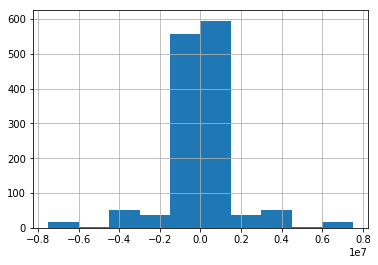

In [41]:
df['diff_in_deaths'].hist(bins=10)

In [42]:
df.corr() # As we can see, using a table is a bit of an eyesore fo examining correlations. 

,warnum,disno,dyindex,statea,stateb,warstrtmnth,warstrtday,warstrtyr,warendmnth,warenday,warendyr,year,warolea,waroleb,wardyadrolea,wardyadroleb,outcomea,batdtha,batdthb,changes_1,changes_2,batdths,durindx,diff_in_days,diff_in_deaths,total_battle_dths
warnum,1.000000,0.291747,0.291744,0.425302,0.425302,0.040938,-0.109482,0.994725,-0.040594,0.312575,0.991655,0.993093,0.041400,0.030218,0.032801,-0.033472,0.012238,0.074996,0.067519,-0.140335,NaN,0.097719,0.149012,0.204943,0.005471,0.096804
disno,0.291747,1.000000,1.000000,-0.048421,-0.048421,-0.121438,0.064510,0.265305,-0.264591,-0.158304,0.249183,0.257142,-0.104491,-0.104444,-0.011994,0.015322,-0.000166,-0.124799,-0.129115,0.617408,NaN,-0.174888,-0.126519,-0.209414,0.003281,-0.172479
dyindex,0.291744,1.000000,1.000000,-0.048429,-0.048429,-0.121434,0.064508,0.265302,-0.264568,-0.158297,0.249180,0.257140,-0.104485,-0.104439,-0.011994,0.015323,-0.000168,-0.124794,-0.129110,0.617405,NaN,-0.174881,-0.126520,-0.209413,0.003281,-0.172472
statea,0.425302,-0.048421,-0.048429,1.000000,0.342502,0.058351,-0.077697,0.443055,-0.049528,0.288053,0.451741,0.447428,-0.069130,0.050490,0.120198,-0.122894,0.095371,-0.102644,-0.120759,0.172829,NaN,-0.152294,0.172543,0.247989,0.013463,-0.151759
stateb,0.425302,-0.048421,-0.048429,0.342502,1.000000,0.059069,-0.080851,0.443055,-0.044394,0.291980,0.451741,0.447428,0.049031,-0.070689,-0.036591,0.033443,-0.066633,-0.113315,-0.110742,0.159722,NaN,-0.152294,0.172543,0.248551,-0.001819,-0.152195
warstrtmnth,0.040938,-0.121438,-0.121434,0.058351,0.059069,1.000000,-0.023318,0.038009,0.189304,-0.002955,0.044948,0.041512,0.072082,0.060464,-0.045874,0.044545,0.009098,0.009888,0.003954,-0.017050,NaN,0.008888,0.088349,0.021652,0.004378,0.009400
warstrtday,-0.109482,0.064510,0.064508,-0.077697,-0.080851,-0.023318,1.000000,-0.134645,0.015521,-0.041546,-0.143768,-0.139283,-0.026638,-0.023639,-0.031375,0.034142,-0.017154,-0.006230,0.004934,0.158909,NaN,-0.001381,-0.125662,-0.190142,-0.008246,-0.000877
warstrtyr,0.994725,0.265305,0.265302,0.443055,0.443055,0.038009,-0.134645,1.000000,-0.050647,0.319090,0.998119,0.998973,0.041470,0.030974,0.035254,-0.036293,0.014328,0.079997,0.071060,-0.111390,NaN,0.103705,0.163255,0.225222,0.006546,0.102606
warendmnth,-0.040594,-0.264591,-0.264568,-0.049528,-0.044394,0.189304,0.015521,-0.050647,1.000000,0.049526,-0.061738,-0.056278,0.113271,0.115267,-0.019217,0.019876,-0.014784,0.024532,0.031755,-0.471653,NaN,0.037881,-0.139316,-0.105020,-0.005356,0.038237
warenday,0.312575,-0.158304,-0.158297,0.288053,0.291980,-0.002955,-0.041546,0.319090,0.049526,1.000000,0.324401,0.321776,0.046160,0.042799,0.031277,-0.031056,-0.003631,-0.046981,-0.048771,0.120877,NaN,-0.064998,0.114935,0.187305,0.001357,-0.065043


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
multico_test = df[["diff_in_days", "diff_in_deaths"]].corr()
multico_test  # Wanted to ensure that these two variables were not highly correlated, thankfully they were not.

In [ ]:
fig, ax = plt.subplots(figsize=(25, 30))
sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    square=False,
    cmap=sns.color_palette("RdBu_r", 9),
)

In [ ]:
df = df.dropna(subset=["outcomea"], axis="rows")

In [47]:
df

,warnum,disno,dyindex,statea,stateb,warstrtmnth,warstrtday,warstrtyr,warendmnth,warenday,warendyr,year,warolea,waroleb,wardyadrolea,wardyadroleb,outcomea,batdtha,batdthb,changes_1,changes_2,batdths,durindx,War_Start_Month_Str,War_Start_Day_Str,War_Start_Year_Str,Dash,Dash2,WarSDate,War_Start_DT,War_End_Month_Str,War_End_Day_Str,War_End_Year_Str,WarEndDate,W_End_Dt,War_Length,diff_in_days,diff_in_deaths,total_battle_dths
0,1,89,89.001,220,230,4,7,1823,9,30,1823,1823,1,3,1,3,1.0,400.0,600.0,NaN,NaN,1000.0,1,4,7,1823,-,-,4-7-1823,1823-04-07,9,30,1823,9-30-1823,1823-09-30,176 days,176,-200.0,1000.0
1,1,89,89.001,230,220,4,7,1823,9,30,1823,1823,3,1,3,1,3.0,600.0,400.0,NaN,NaN,1000.0,1,4,7,1823,-,-,4-7-1823,1823-04-07,9,30,1823,9-30-1823,1823-09-30,176 days,176,200.0,1000.0
2,4,189,189.001,365,640,4,30,1828,8,19,1829,1828,1,3,1,3,1.0,80000.0,50000.0,NaN,NaN,130000.0,1,4,30,1828,-,-,4-30-1828,1828-04-30,8,19,1829,8-19-1829,1829-08-19,476 days,476,30000.0,130000.0
3,4,189,189.001,365,640,4,30,1828,8,19,1829,1829,1,3,1,3,1.0,80000.0,50000.0,NaN,NaN,130000.0,2,4,30,1828,-,-,4-30-1828,1828-04-30,8,19,1829,8-19-1829,1829-08-19,476 days,476,30000.0,130000.0
4,4,189,189.001,640,365,4,30,1828,8,19,1829,1828,3,1,3,1,3.0,50000.0,80000.0,NaN,NaN,130000.0,2,4,30,1828,-,-,4-30-1828,1828-04-30,8,19,1829,8-19-1829,1829-08-19,476 days,476,-30000.0,130000.0
5,4,189,189.001,640,365,4,30,1828,8,19,1829,1829,3,1,3,1,3.0,50000.0,80000.0,NaN,NaN,130000.0,1,4,30,1828,-,-,4-30-1828,1828-04-30,8,19,1829,8-19-1829,1829-08-19,476 days,476,-30000.0,130000.0
6,7,1552,1552.001,2,70,4,25,1846,9,14,1847,1846,1,3,1,3,1.0,13283.0,6000.0,NaN,NaN,19283.0,1,4,25,1846,-,-,4-25-1846,1846-04-25,9,14,1847,9-14-1847,1847-09-14,507 days,507,7283.0,19283.0
7,7,1552,1552.001,2,70,4,25,1846,9,14,1847,1847,1,3,1,3,1.0,13283.0,6000.0,NaN,NaN,19283.0,2,4,25,1846,-,-,4-25-1846,1846-04-25,9,14,1847,9-14-1847,1847-09-14,507 days,507,7283.0,19283.0
8,7,1552,1552.001,70,2,4,25,1846,9,14,1847,1846,3,1,3,1,3.0,6000.0,13283.0,NaN,NaN,19283.0,1,4,25,1846,-,-,4-25-1846,1846-04-25,9,14,1847,9-14-1847,1847-09-14,507 days,507,-7283.0,19283.0
9,7,1552,1552.001,70,2,4,25,1846,9,14,1847,1847,3,1,3,1,3.0,6000.0,13283.0,NaN,NaN,19283.0,2,4,25,1846,-,-,4-25-1846,1846-04-25,9,14,1847,9-14-1847,1847-09-14,507 days,507,-7283.0,19283.0


In [48]:
df = df.select_dtypes(exclude=[object])

In [49]:
# Below, I eliminate a few superfluous columns that I won't be using.

In [ ]:
df = df.drop(
    columns=[
        "warnum",
        "disno",
        "dyindex",
        "changes_1",
        "changes_2",
        "War_Start_DT",
        "W_End_Dt",
        "War_Length",
        "batdths",
    ]
)

In [ ]:
df.to_csv("clean_war_data.csv", index=False)

# Reading In the Clean Dataset Alongside of the Second One

In [ ]:
clean_war_set = pd.read_csv("clean_war_data.csv")  # upload clean war dataset

In [ ]:
NMC_Data = pd.read_csv(
    "NMC_5_0.csv"
)  # loads national material capabilities dataset. Gives more granular understanding of
# state capabilities in the form of military expenditures, military personnel available, total population, urban population,
# energy use, Iron and Steel production, as well as a composite score of each.

In [54]:
NMC_Data.head()

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039698,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011


In [ ]:
df.info()  # At first glance, it looks as if there is no missing data, bu we need to do more digging to be sure.

In [56]:
NMC_Data.shape #The NMC dataset seems to have many more rows and fewer columns

(15171, 11)

# Data Cleaning, Transformation, and Exploration for the Second Dataset

In [ ]:
NMC_Data = NMC_Data.rename(
    columns={
        "ccode": "statea",
        "milex": "defensebudget",
        "milper": "milsize",
        "irst": "IronSteelProduct",
        "pec": "EnergyUse",
        "tpop": "totalpop",
        "upop": "urbanpop",
        "cinc": "CINCscore",
    }
)
# Changing column labels to make the dataset more readable and less awkward to use

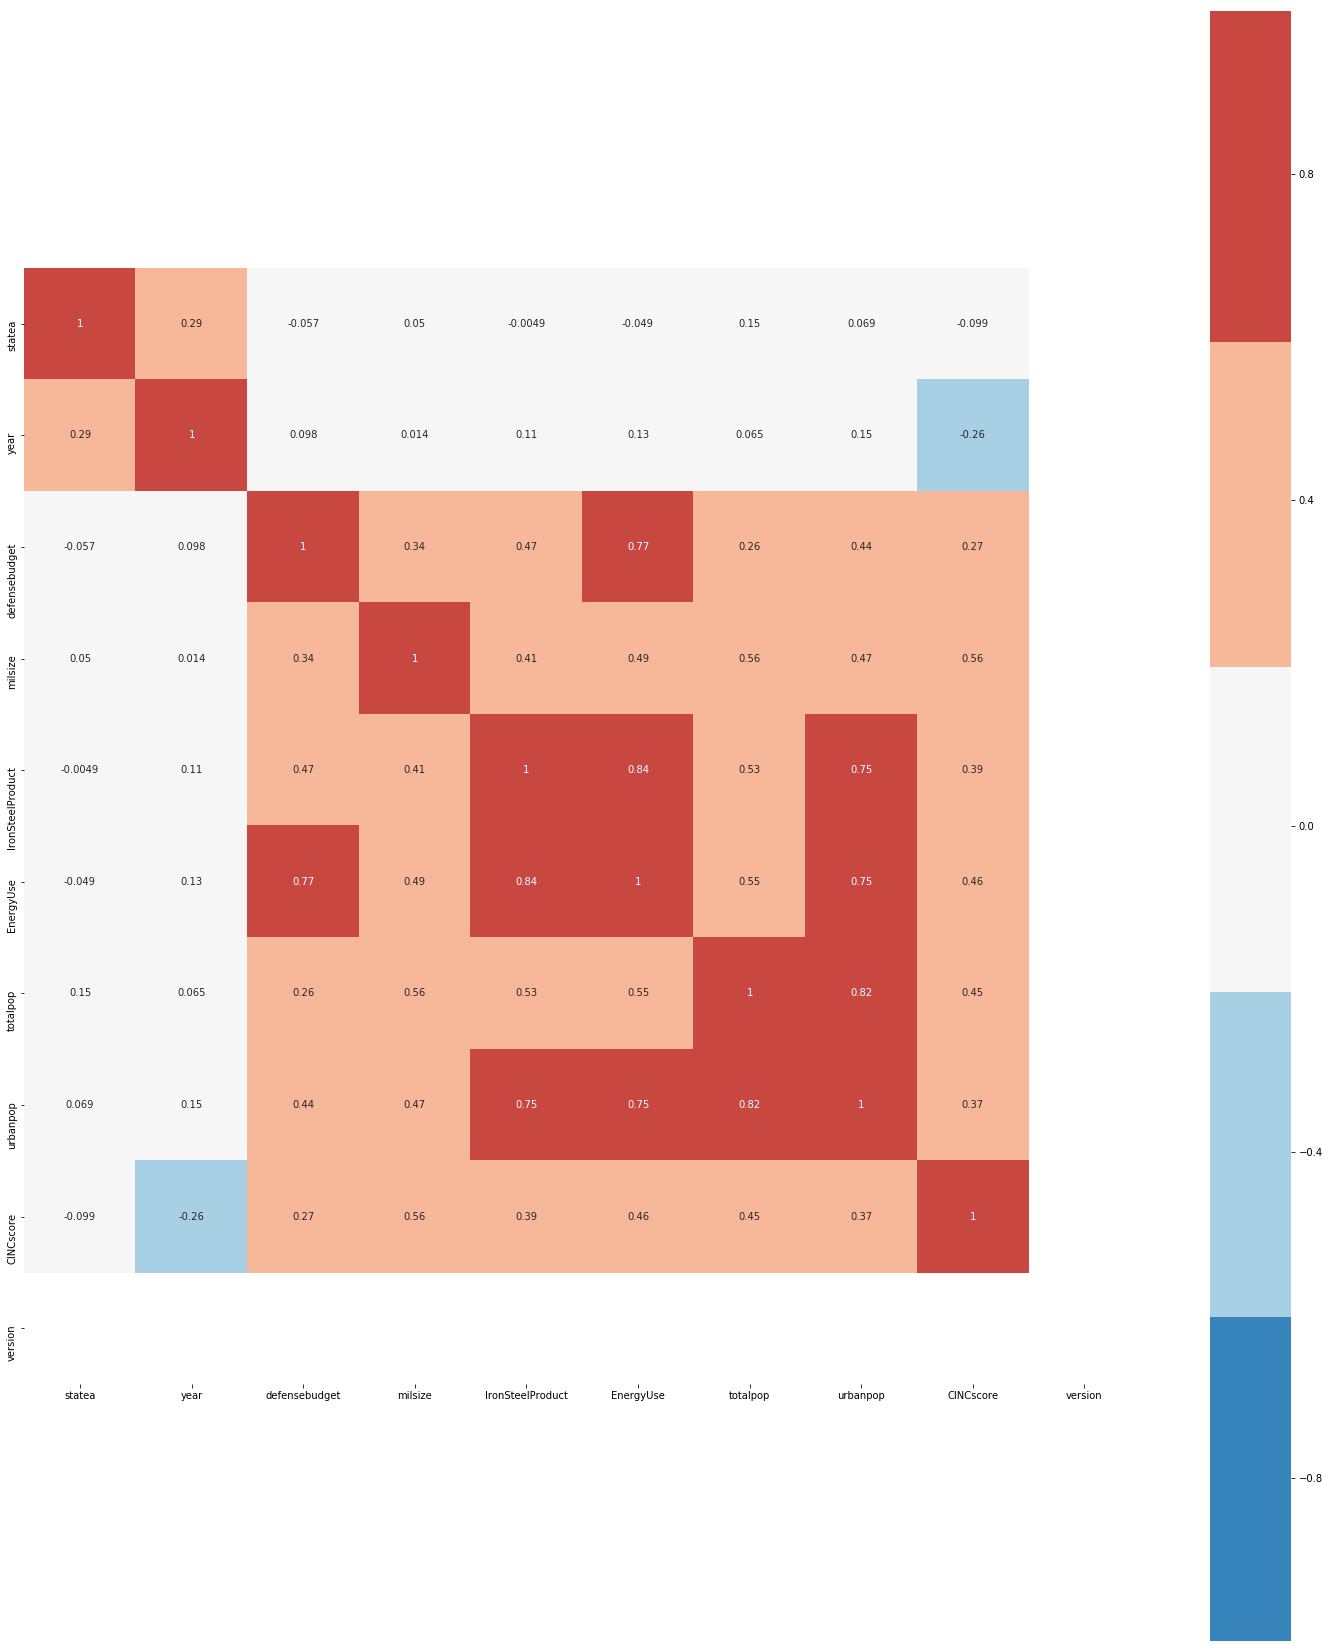

In [166]:
fig, ax = plt.subplots(
    figsize=(25, 30)
)  # correlation matrix to see how the variables are related to one another. Powerful tool to uncover potential multi-collinearity.
sns.heatmap(
    NMC_Data.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    annot=True,
    cmap=sns.color_palette("RdBu_r", 5),
)

In [ ]:
# As we can see in the above heatmap, multi-collinearity could be a problem if we choose to use each column as an independent
# variable.

In [ ]:
test = NMC_Data[(NMC_Data < 0).any(axis=1)]
test.sample(
    10
)  # As this cell shows, we might have have some problems with missing variables. -9 is the same as missing value
# according to the codebook that came with the NMC dataset. This means we need to additional cleaning.

In [61]:
# Next few steps show how big the missing data problem is for each column.

In [ ]:
missing_def = NMC_Data["defensebudget"] < 0
missing_def.value_counts(
    normalize=True
)  # Over 13 percent of defense budget values are missing

In [ ]:
missing_mil_size = NMC_Data["milsize"] < 0
missing_mil_size.value_counts(
    normalize=True
)  # sligty under 3 percent of values missing

In [ ]:
missing_iron_steel = NMC_Data["IronSteelProduct"] < 0
missing_iron_steel.value_counts(
    normalize=True
)  # almost two-tenths of a percent missing

In [ ]:
missing_energy_use = NMC_Data["EnergyUse"] < 0
missing_energy_use.value_counts(
    normalize=True
)  # A little over 3 percent of values missing

In [ ]:
missing_total_population = NMC_Data["totalpop"] < 0
missing_total_population.value_counts(normalize=True)  # No values missing

In [ ]:
missing_urban_population = NMC_Data["urbanpop"] < 0
missing_urban_population.value_counts(
    normalize=True
)  # A little over four-tenths of values missing

In [ ]:
missing_CINC = NMC_Data["CINCscore"] < 0
missing_CINC.value_counts(normalize=True)  # no values missing

In [ ]:
# The next step focuses on checking the distribution of the data to get an idea as what values could potentially be used
# to fill in the missing data and inform our choice of models and tests

In [ ]:
NMC_Data["defensebudget"].hist(bins=10)
NMC_Data["defensebudget"].describe()

In [ ]:
NMC_Data["milsize"].hist(bins=20)
NMC_Data["milsize"].describe()

In [ ]:
NMC_Data["IronSteelProduct"].hist(bins=30)
NMC_Data["IronSteelProduct"].describe()

In [ ]:
NMC_Data["EnergyUse"].hist(bins=30)
NMC_Data["EnergyUse"].describe()

In [ ]:
NMC_Data["urbanpop"].hist(bins=30)
NMC_Data["urbanpop"].describe()

In [ ]:
NMC_Data["CINCscore"].hist(bins=25)
NMC_Data["CINCscore"].describe()

In [76]:
# As we can see in the cells above, the data is extremely skewed. All of the distributions have a strong positive skew. 

In [ ]:
NMC_Data = NMC_Data.replace(
    -9, np.nan
)  # Replace the dataset's NA value, -9, with a negative value that Pandas can use

In [ ]:
NMC_Data["defensebudget"].sample(
    30
)  # As we can see, the previous cell was able to replace -9 with usable null values

In [ ]:
defense_mode = NMC_Data["defensebudget"].mode()
defense_mode = defense_mode.values[
    0
]  # 2nd line of code converts to int64 object to be usable. Repeat for next few cells.

In [ ]:
milsize_mode = NMC_Data["milsize"].mode()
milsize_mode = milsize_mode.values[0]

In [ ]:
Iron_Steel_Mode = NMC_Data["IronSteelProduct"].mode()
Iron_Steel_Mode = Iron_Steel_Mode.values[0]

In [ ]:
energy_use_mode = NMC_Data["EnergyUse"].mode()
energy_use_mode = energy_use_mode.values[0]

In [ ]:
urban_pop_mode = NMC_Data["urbanpop"].mode()
urban_pop_mode = urban_pop_mode.values[0]

In [ ]:
total_pop_mode = NMC_Data["totalpop"].mode()
total_pop_mode = total_pop_mode.values[0]

In [ ]:
cinc_score_mode = NMC_Data["CINCscore"].mode()
cinc_score_mode = cinc_score_mode.values[0]

In [ ]:
# So far, missing values are not that big of a concern for most independent variables. Given how skewed the values are,
# it might make more sense to use the mode of each coumns to fill in the missing values without it heavily impacting the
# analysis.

In [ ]:
NMC_Data["defensebudget"] = NMC_Data["defensebudget"].fillna(value=defense_mode)

In [ ]:
NMC_Data["milsize"] = NMC_Data["milsize"].fillna(value=milsize_mode)

In [ ]:
NMC_Data["IronSteelProduct"] = NMC_Data["IronSteelProduct"].fillna(
    value=Iron_Steel_Mode
)

In [ ]:
NMC_Data["EnergyUse"] = NMC_Data["EnergyUse"].fillna(value=energy_use_mode)

In [ ]:
NMC_Data["urbanpop"] = NMC_Data["urbanpop"].fillna(value=urban_pop_mode)

In [ ]:
NMC_Data["totalpop"] = NMC_Data["totalpop"].fillna(value=total_pop_mode)

In [ ]:
NMC_Data["CINCscore"] = NMC_Data["CINCscore"].fillna(value=cinc_score_mode)

In [ ]:
Intermediate_DS = pd.merge(
    NMC_Data, clean_war_set, on=["statea", "year"], sort=True
)  # Merge the MNC data with the clean
# war dataset based on the values for state a and the year of the conflict

In [95]:
Intermediate_DS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1359
Data columns (total 29 columns):
stateabb             1360 non-null object
statea               1360 non-null int64
year                 1360 non-null int64
defensebudget        1360 non-null float64
milsize              1360 non-null float64
IronSteelProduct     1360 non-null float64
EnergyUse            1360 non-null float64
totalpop             1360 non-null float64
urbanpop             1360 non-null float64
CINCscore            1360 non-null float64
version              1360 non-null int64
stateb               1360 non-null int64
warstrtmnth          1360 non-null int64
warstrtday           1360 non-null int64
warstrtyr            1360 non-null int64
warendmnth           1360 non-null int64
warenday             1360 non-null int64
warendyr             1360 non-null int64
warolea              1360 non-null int64
waroleb              1360 non-null int64
wardyadrolea         1360 non-null int64
wardyadroleb     

In [96]:
Intermediate_DS.shape

(1360, 29)

In [ ]:
fig, ax = plt.subplots(
    figsize=(30, 35)
)  # correlation matrix to see how the variables are related to one another. Powerful tool to uncover potential multi-collinearity.
sns.heatmap(
    Intermediate_DS.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    annot=True,
    cmap=sns.color_palette("RdBu_r", 5),
)

In [ ]:
d = {"stateb": Intermediate_DS["stateb"], "year": Intermediate_DS["year"]}
tst_df = pd.DataFrame(
    data=d
)  # Since the dataset I plan to use examines war in a dyadic context, I need CINC values in
# the table for state b and they need to align with the year of the conflict. Only then can I create an independent variable
# that measures the differences in capabiltiies between statea and stateb.

In [99]:
tst_df.shape

(1360, 2)

In [100]:
tst_df.head()

,stateb,year
0,70,1846
1,70,1847
2,230,1898
3,710,1900
4,255,1917


In [ ]:
Interim_df = pd.merge(
    tst_df,
    NMC_Data,
    left_on=["stateb", "year"],
    right_on=["statea", "year"],
    how="inner",
    sort=True,
)

In [102]:
Interim_df.shape

(1360, 12)

In [103]:
Interim_df.head()

,stateb,year,stateabb,statea,defensebudget,milsize,IronSteelProduct,EnergyUse,totalpop,urbanpop,CINCscore,version
0,2,1846,USA,2,9506.0,39.0,777.0,4863.0,20794.0,846.0,0.082757,2011
1,2,1847,USA,2,7431.0,58.0,813.0,5767.0,21406.0,918.0,0.084510,2011
2,2,1898,USA,2,60011.0,236.0,11963.0,207271.0,73494.0,13162.0,0.197062,2011
3,2,1900,USA,2,41481.0,126.0,10352.0,256081.0,76094.0,14207.0,0.187999,2011
4,2,1917,USA,2,658584.0,644.0,45784.0,710959.0,103268.0,25310.0,0.244028,2011


In [ ]:
Interim_df = Interim_df.drop(
    columns=[
        "stateabb",
        "statea",
        "defensebudget",
        "milsize",
        "IronSteelProduct",
        "EnergyUse",
        "totalpop",
        "urbanpop",
    ]
)

In [ ]:
Interim_df.head()  # Now we have the stateb country code values along with the CINCscores for stateb to merge in our final dataset

In [ ]:
Interim_df.shape  # Number of rows looks good

In [ ]:
Interim_df = Interim_df.rename(columns={"CINCscore": "CINC_b"})  # To avoid confusion

In [ ]:
Comp_War_Dataset = pd.merge(
    Intermediate_DS, Interim_df, on=["year", "stateb"], how="left"
)

In [ ]:
Comp_War_Dataset.head()  # columns look good

In [110]:
Comp_War_Dataset.shape #Looks like we have a problem with duplicate rows

(5700, 31)

In [111]:
Comp_War_Dataset = Comp_War_Dataset.drop_duplicates()

In [ ]:
Comp_War_Dataset.shape  # Duplicate problem solved

In [ ]:
Comp_War_Dataset = Comp_War_Dataset.rename(
    columns={"CINCscore": "CINC_Score_A", "CINC_b": "CINC_Score_B"}
)

In [114]:
Comp_War_Dataset['diff_CINC'] = Comp_War_Dataset['CINC_Score_A'] - Comp_War_Dataset['CINC_Score_B']


In [ ]:
Comp_War_Dataset.head()  # Everything looks good. Ready to train models.

In [ ]:
Comp_War_Dataset.to_csv("comp_war_data.csv", index=False)